В домашнем задании нужно решить задачу классификации точек наиболее эффективно. Для этого в работе необходимо применить различные методы по отбору признаков. Отбор признаков предпочтительнее осуществлять основываясь на математическом аппарате, поэтому данные для этого задания будут сгенерированы, чтобы избежать признаков с физическим смыслом.

Сгенерируйте данные с помощью кода:
from sklearn.datasets import make_classification
x_data_generated, y_data_generated = make_classification(scale=1)

Постройте модель логистической регрессии и оцените среднюю точность. Для этого используйте следующий код:
cross_val_score(LogisticRegression(), x, y, scoring=‘accuracy’).mean()

Используйте статистические методы для отбора признаков:
a) Выберите признаки на основе матрицы корреляции.
b) Отсеките низковариативные признаки (VarianceThreshold).
c) Повторите п. 2 на отобранных признаках в п. 3a, п. 3b.

Осуществите отбор признаков на основе дисперсионного анализа:
a) Выберите 5 лучших признаков с помощью скоринговой функции для классификации f_classif (SelectKBest(f_classif, k=5)).
b) Повторите п. 2 на отобранных признаках.

Отбор с использованием моделей:
a) Реализуйте отбор признаков с помощью логистической регрессии. Отобранные признаки подайте далее на вход в саму логистическую регрессию (SelectFromModel). Используйте L1 регуляризацию.
b) Реализуйте отбор признаков с помощью модели RandomForest и встроенного атрибута feature_impotance.
c) Повторите п. 2 на отобранных признаках в п. 5a, п. 5b.

Перебор признаков:
a) SequentialFeatureSelector.
b) Повторите п. 2 на отобранных признаках.

Сформулируйте выводы по проделанной работе:
a) Сделайте таблицу вида |способ выбора признаков|количество признаков|средняя точность модели|.

In [213]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets, tree
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import math

In [214]:
from sklearn.datasets import make_classification
x_data_generated, y_data_generated = make_classification(scale=1)
data = pd.DataFrame(x_data_generated)

Постройте модель логистической регрессии и оцените среднюю точность. Для этого используйте следующий код:
cross_val_score(LogisticRegression(), x, y, scoring=‘accuracy’).mean()

In [215]:
lr = LogisticRegression()
lr.fit(data, y_data_generated)
score = cross_val_score(lr, data, y_data_generated, scoring='accuracy').mean()
print(f"{score:.2f}")

0.87


Используйте статистические методы для отбора признаков:
a) Выберите признаки на основе матрицы корреляции.
b) Отсеките низковариативные признаки (VarianceThreshold).
c) Повторите п. 2 на отобранных признаках в п. 3a, п. 3b.

<Axes: >

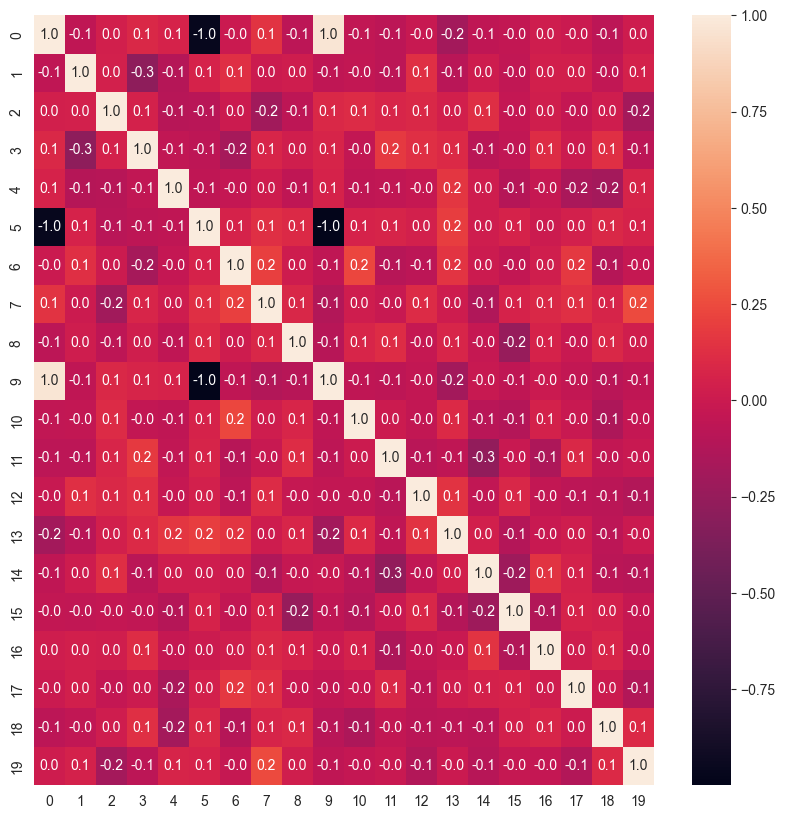

In [216]:
corr_matrix = data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.1f')

In [217]:
# remove features with low correlation
corr_matrix = corr_matrix.abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

# Drop features
data.drop(to_drop, axis=1, inplace=True)


In [218]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.0)
data = selector.fit_transform(data)

In [219]:
lr = LogisticRegression()
lr.fit(data, y_data_generated)
score = cross_val_score(lr, data, y_data_generated, scoring='accuracy').mean()
print(f"{score:.2f}")

0.87


Осуществите отбор признаков на основе дисперсионного анализа:
a) Выберите 5 лучших признаков с помощью скоринговой функции для классификации f_classif (SelectKBest(f_classif, k=5)).
b) Повторите п. 2 на отобранных признаках.

In [220]:
data = pd.DataFrame(x_data_generated)
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k=5)
data = selector.fit_transform(data, y_data_generated)

In [221]:
lr = LogisticRegression()
lr.fit(data, y_data_generated)
score = cross_val_score(lr, data, y_data_generated, scoring='accuracy').mean()
print(f"{score:.2f}")

0.90


Отбор с использованием моделей:
a) Реализуйте отбор признаков с помощью логистической регрессии. Отобранные признаки подайте далее на вход в саму логистическую регрессию (SelectFromModel). Используйте L1 регуляризацию.
b) Реализуйте отбор признаков с помощью модели RandomForest и встроенного атрибута feature_importance.
c) Повторите п. 2 на отобранных признаках в п. 5a, п. 5b.

In [222]:
data = pd.DataFrame(x_data_generated)
from sklearn.feature_selection import SelectFromModel
selector = SelectFromModel(LogisticRegression(penalty='l1', solver='liblinear'))
data = selector.fit_transform(data, y_data_generated)
data.shape

(100, 13)

In [223]:
lr = LogisticRegression()
lr.fit(data, y_data_generated)
score = cross_val_score(lr, data, y_data_generated, scoring='accuracy').mean()
print(f"{score:.2f}")

0.90


In [224]:
data = pd.DataFrame(x_data_generated)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(data, y_data_generated)
feature_importance = rf.feature_importances_

In [225]:
selector = SelectFromModel(RandomForestClassifier())
data = selector.fit_transform(data, y_data_generated)
data.shape

(100, 3)

In [226]:
lr = LogisticRegression()
lr.fit(data, y_data_generated)
score = cross_val_score(lr, data, y_data_generated, scoring='accuracy').mean()
print(f"{score:.2f}")

0.87


Перебор признаков:
a) SequentialFeatureSelector.
b) Повторите п. 2 на отобранных признаках.

In [227]:
data = pd.DataFrame(x_data_generated)
from sklearn.feature_selection import SequentialFeatureSelector as SFS

sfs = SFS(LogisticRegression(), scoring='accuracy', cv=5)
sfs.fit(data, y_data_generated)
data_new = sfs.transform(data)


lr = LogisticRegression()
score = cross_val_score(lr, data_new, y_data_generated, scoring='accuracy').mean()
print(f"{score:.2f}")

0.93


In [228]:
data_new.shape

(100, 10)

## вывод
| способ выбора признаков                    | количество признаков | средняя точность модели |
|--------------------------------------------|----------------------|-------------------------|
| матрица корреляции и VarianceThreshold     | 8                    | 0.87                    |
| дисперсионный анализ и SelectKBest         | 5                    | 0.90                    |
| логистическая регрессия и SelectFromModel  | 14                   | 0.90                    |
| случайный лес и SelectFromModel            | 3                    | 0.87                    |
| SequentialFeatureSelector                  | 10                   | 0.93                    |